In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
imdb_df = pd.read_csv("hierar/val_10k.csv", delimiter=',')
imdb_df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1/1,4.0,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,0/0,1.0,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,0/0,5.0,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,0/0,5.0,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1/1,4.0,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys


In [3]:
X_train, X_test, y_train, y_test = train_test_split(imdb_df['Text'], imdb_df['Score'], test_size=0.5, random_state=1)

In [4]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [5]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)

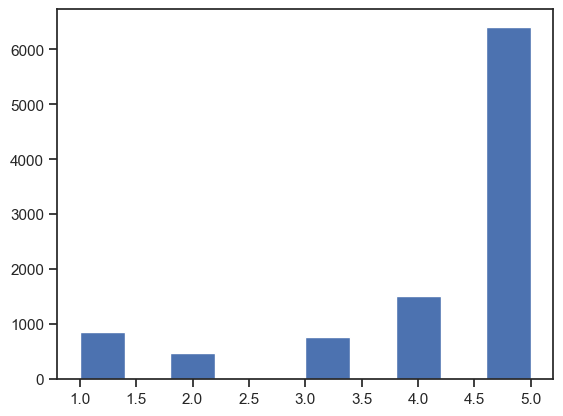

In [6]:
# В целевом признаке распределение классов относительно равномерное
plt.hist(imdb_df['Score'])
plt.show()

In [7]:
# Классификация с использованием логистической регресии
sentiment(TfidfVectorizer(), LogisticRegression(C=5.0))

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Метка 	 Accuracy
1.0 	 0.4119106699751861
2.0 	 0.02834008097165992
3.0 	 0.15300546448087432
4.0 	 0.1844532279314888
5.0 	 0.9252713178294574


In [8]:
sentiment(CountVectorizer(), LogisticRegression(C=5.0))

Метка 	 Accuracy
1.0 	 0.4491315136476427
2.0 	 0.09716599190283401
3.0 	 0.19672131147540983
4.0 	 0.2648221343873518
5.0 	 0.8365891472868217


c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [9]:
sentiment(CountVectorizer(), MultinomialNB())

Метка 	 Accuracy
1.0 	 0.12158808933002481
2.0 	 0.016194331983805668
3.0 	 0.00819672131147541
4.0 	 0.03557312252964427
5.0 	 0.9801550387596899


In [10]:
sentiment(TfidfVectorizer(), MultinomialNB())

Метка 	 Accuracy
1.0 	 0.0
2.0 	 0.0
3.0 	 0.0
4.0 	 0.0
5.0 	 1.0


In [11]:
sentiment(CountVectorizer(), ComplementNB())

Метка 	 Accuracy
1.0 	 0.5062034739454094
2.0 	 0.048582995951417005
3.0 	 0.12021857923497267
4.0 	 0.15151515151515152
5.0 	 0.9094573643410853


In [12]:
sentiment(TfidfVectorizer(), ComplementNB())

Метка 	 Accuracy
1.0 	 0.05459057071960298
2.0 	 0.012145748987854251
3.0 	 0.00273224043715847
4.0 	 0.006587615283267457
5.0 	 0.9950387596899225


In [13]:
sentiment(CountVectorizer(binary=True), BernoulliNB())

Метка 	 Accuracy
1.0 	 0.10173697270471464
2.0 	 0.0
3.0 	 0.01912568306010929
4.0 	 0.06719367588932806
5.0 	 0.9444961240310078


In [14]:
sentiment(TfidfVectorizer(), BernoulliNB())

Метка 	 Accuracy
1.0 	 0.10173697270471464
2.0 	 0.0
3.0 	 0.01912568306010929
4.0 	 0.06719367588932806
5.0 	 0.9444961240310078
